Ingrese las ecuaciones en términos de 't'. Presione Enter para finalizar.
Ingrese los límites de integración de la ecuación anterior
Ingrese los límites de integración de la ecuación anterior
++++++++++++++++ Funcion ingresada ++++++++++++++++


Piecewise((2*t + 3, (t >= -1.0) & (t <= 0)), (-1, (t <= 1.0) & (t >= 0)))

'integral_Co = '

2.00000000000000

' integral_Cn = '

-1.0*(-3.0*I*pi*n - 2.0)/(pi**2*n**2) + 1.0*(-1.0*I*pi*n - 2.0)*exp(1.0*I*pi*n)/(pi**2*n**2)

'integral_Co = '

1.00000000000000

' integral_Cn = '

1.0*I/(pi*n) - 1.0*I*exp(-1.0*I*pi*n)/(pi*n) - 1.0*(-3.0*I*pi*n - 2.0)/(pi**2*n**2) + 1.0*(-1.0*I*pi*n - 2.0)/(pi**2*n**2*((-1)**n)**1.0)

'Co'

0.500000000000000

'Cn'

-0.5*I*((-1)**n)**1.0/(pi*n) + 0.5*I/(pi*n) - 0.5*(-3.0*I*pi*n - 2.0)/(pi**2*n**2) + 0.5*(-1.0*I*pi*n - 2.0)/(pi**2*n**2*((-1)**n)**1.0)

'Cn_real'

-1.0*cos(pi*n)/(pi**2*n**2) + 1.0/(pi**2*n**2)

'Cn_imag'

-1.0*cos(pi*n)/(pi*n) + 2.0/(pi*n) - 1.0*sin(pi*n)/(pi**2*n**2)

n_values  [-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
y_values_funcion1  [0.05305164769729845, 0.19115786250549982, 0.07957747154594767, 0.31910522673404906, 0.15915494309189535, 0.9761939263280516, 0.500000000000000, 0.9761939263280516, 0.15915494309189535, 0.31910522673404906, 0.07957747154594767, 0.19115786250549982, 0.05305164769729845]
y_values_funcion2  [-1.5707963267948966, -1.5283804638256575, -1.5707963267948966, -1.5001784190521934, -1.5707963267948966, -1.3616916829711636, 0, 1.3616916829711636, 1.5707963267948966, 1.5001784190521934, 1.5707963267948966, 1.5283804638256575, 1.5707963267948966]


<lambdifygenerated-12>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return arctan((-1.0*cos(pi*n)/(pi*n) + 2.0/(pi*n) - 1.0*sin(pi*n)/(pi**2*n**2))/(-1.0*cos(pi*n)/(pi**2*n**2) + 1.0/(pi**2*n**2)))


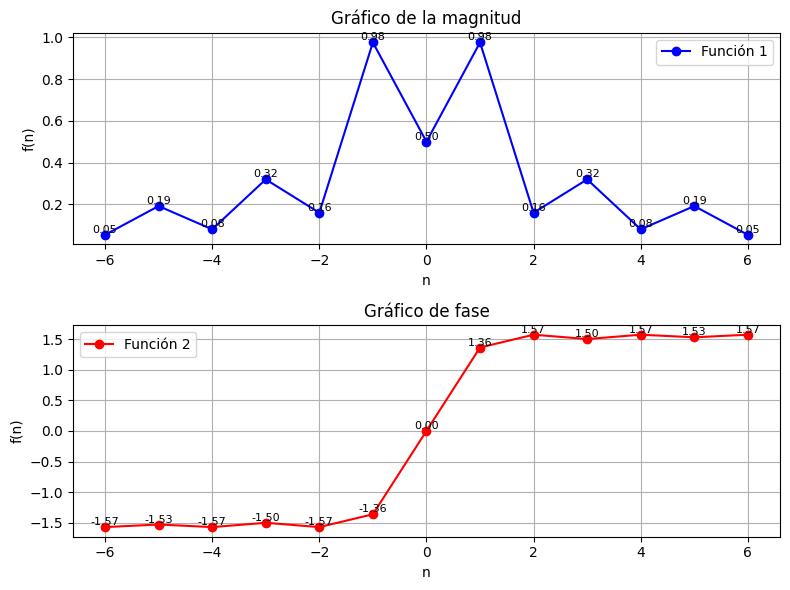

In [5]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

def aplicar_equivalencias(expresion):
    t = sp.symbols("t")
    n = sp.symbols("n")

    equivalencias = {
        sp.sin(sp.pi * n): 0,
        sp.cos(sp.pi * n): (-1)**n,
        sp.sin(2 * sp.pi * n): 0,
        sp.cos(2 * sp.pi * n): 1,
        sp.E**(-2 * sp.I * n * sp.pi ): 1,
        sp.E**(2 * sp.I * n * sp.pi ): 1,
        sp.E**(-sp.I * n * sp.pi ): (-1)**n,
        sp.E**(sp.I * n * sp.pi ): (-1)**n
    }
    for eq, val in equivalencias.items():
        expresion = expresion.subs(eq, val)
    return expresion

def ingresar_funcion_a_trozos():
    t = sp.symbols("t")
    print("Ingrese las ecuaciones en términos de 't'. Presione Enter para finalizar.")

    expresiones_condiciones = []
    menor_limite = float('inf')
    mayor_limite = float('-inf')

    while True:
        ecuacion = input("\nIngrese una ecuación (en términos de t): ")
        if not ecuacion:
            break

        try:
            print("Ingrese los límites de integración de la ecuación anterior")
            limite_inferior = float(input("Ingrese el límite inferior: "))
            limite_superior = float(input("Ingrese el límite superior: "))

            menor_limite = min(menor_limite, limite_inferior)
            mayor_limite = max(mayor_limite, limite_superior)

            expresion = sp.sympify(ecuacion)
            condicion = (limite_inferior <= sp.Symbol('t')) & (sp.Symbol('t') <= limite_superior)
            expresiones_condiciones.append((expresion, condicion))

        except sp.SympifyError:
            print("Error: No se pudo parsear la ecuación.")

    funcion_trozos = sp.Piecewise(*expresiones_condiciones)
    return funcion_trozos, menor_limite, mayor_limite

def hallar_coeficientes(funcion_original, menor_limite, mayor_limite):
    t = sp.symbols('t')
    n = sp.symbols("n", domain='N')
    T = abs(menor_limite - mayor_limite)
    w = (2 * sp.pi) / T

    integral_ao = sp.sympify(0)
    integral_an = sp.sympify(0)
    integral_bn = sp.sympify(0)

    for expr, cond in funcion_original.args:
        inecuaciones = cond.args
        a = float('inf')
        b = float('-inf')
        for i in  range(0,len(inecuaciones),1):
            if isinstance(inecuaciones[i].args[1], sp.Lt) or isinstance(inecuaciones[i].args[1], sp.Le) or isinstance(inecuaciones[i].args[1], sp.Gt) or isinstance(inecuaciones[i].args[1], sp.Ge):
                a = min(a, inecuaciones[i].args[1].args[1])
                b = max(b, inecuaciones[i].args[1].args[1])
            else:
                a = min(a, inecuaciones[i].args[1])
                b = max(b, inecuaciones[i].args[1])
            #print("a = ",a,"  b = ",b)

        integral_ao = integral_ao + (sp.integrate(expr, (t, a, b)))
        integral_an = integral_an + (sp.integrate(sp.sympify(expr * sp.cos(n * w * t)), (t, a, b))).args[0][0] 
        integral_bn = integral_bn + (sp.integrate(sp.sympify(expr * sp.sin(n * w * t)), (t, a, b))).args[0][0] 

    return integral_ao*(2/T), integral_an*(2/T), integral_bn*(2/T)

def hallar_serie_Fourier(funcion_a_trozos, menor_limite, mayor_limite, nmax):
    t = sp.symbols('t')
    n = sp.symbols("n")
    T = abs(menor_limite - mayor_limite)
    w = (2 * sp.pi) / T
    ao, an, bn = hallar_coeficientes(funcion_a_trozos, menor_limite, mayor_limite)

    print("\n----------- Ao ----------- ")
    display(ao)
    print("\n----------- An ----------- ")
    display(an)
    print("\n----------- Bn ----------- ")
    display(bn)


    serie_Fourier = ao/2 + sp.summation(an*sp.cos(n*w*t) + bn*sp.sin(n*w*t), (n, 1, nmax))
    return serie_Fourier

def hallar_coeficientes_espectros_discretos(funcion_original, menor_limite, mayor_limite):
    t = sp.symbols('t')
    n = sp.symbols("n")
    T = abs(menor_limite - mayor_limite)
    w = (2 * sp.pi) / T

    integral_Co = sp.sympify(0)
    integral_Cn = sp.sympify(0)

    for expr, cond in funcion_original.args:
        inecuaciones = cond.args
        a = float('inf')
        b = float('-inf')
        for i in  range(0,len(inecuaciones),1):
            if isinstance(inecuaciones[i].args[1], sp.Lt) or isinstance(inecuaciones[i].args[1], sp.Le) or isinstance(inecuaciones[i].args[1], sp.Gt) or isinstance(inecuaciones[i].args[1], sp.Ge):
                a = min(a, inecuaciones[i].args[1].args[1])
                b = max(b, inecuaciones[i].args[1].args[1])
            else:
                a = min(a, inecuaciones[i].args[1])
                b = max(b, inecuaciones[i].args[1])
            #print("a = ",a,"  b = ",b)

        if a < b:
            integral_Co = integral_Co + (sp.integrate(expr, (t, a, b)))
            integral_Cn = integral_Cn + (sp.integrate(sp.sympify(expr * sp.E**(-sp.I * n * w * t)), (t, a, b))).args[0][0] 

        display ("integral_Co = ",integral_Co," integral_Cn = ",integral_Cn)

        integral_Co = aplicar_equivalencias(integral_Co)
        integral_Cn = aplicar_equivalencias(integral_Cn)

    ao, an, bn = hallar_coeficientes(funcion_original, menor_limite, mayor_limite)

    #display("an ",an,"bn ",  bn)

    Cn_real = (1/2)*(an)
    Cn_imag = (1/2)*(-bn)

    return sp.sympify(integral_Co/T), sp.sympify(integral_Cn/T), sp.sympify(Cn_real), sp.sympify(Cn_imag)

def graficar_discretos_espectro_magnitud_fase(n_inicio, n_fin, num_puntos, Cn_real, Cn_imag, Co):
    n = sp.symbols('n')

    # Definir las funciones como lambdify
    funcion1 = sp.lambdify(n, sp.sqrt(Cn_real**2 + Cn_imag**2), 'numpy')
    funcion2 = sp.lambdify(n, sp.atan(Cn_imag/Cn_real), 'numpy')

    # Crear una figura con dos subgráficos
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # Calcular valores de n
    n_values = np.linspace(n_inicio, n_fin, num_puntos)

    print("n_values ", n_values)
    
    # Calcular valores de y para cada función
    y_values_funcion1 = [funcion1(valor) if valor != 0 else Co for valor in n_values]

    y_values_funcion2 = []
    for valor in n_values:
        if valor <= -1 or valor >= 1:
            if Cn_real.subs(n, valor) != 0:
                y_values_funcion2.append(funcion2(valor))
            else:
                y_values_funcion2.append(sp.pi/2 if valor >= 0 else -sp.pi/2)
        else:
            y_values_funcion2.append(0)

    print("y_values_funcion1 ", y_values_funcion1)
    print("y_values_funcion2 ", y_values_funcion2)

    # Graficar la primera función en el primer subgráfico
    ax1.plot(n_values, y_values_funcion1, color='blue', label='Función 1', marker='o')
    ax1.set_xlabel('n')
    ax1.set_ylabel('f(n)')
    ax1.set_title('Gráfico de la magnitud')
    ax1.grid(True)
    ax1.legend()

    # Añadir la altura numérica de cada punto en la gráfica de la Función 1
    for i, (x, y) in enumerate(zip(n_values, y_values_funcion1)):
        ax1.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='black')

    # Graficar la segunda función en el segundo subgráfico
    ax2.plot(n_values, y_values_funcion2, color='red', label='Función 2', marker='o')
    ax2.set_xlabel('n')
    ax2.set_ylabel('f(n)')
    ax2.set_title('Gráfico de fase')
    ax2.grid(True)
    ax2.legend()

    # Añadir la altura numérica de cada punto en la gráfica de la Función 2
    for i, (x, y) in enumerate(zip(n_values, y_values_funcion2)):
        ax2.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='black')

    # Ajustar diseño de la figura
    plt.tight_layout()
    plt.show()

def graficar_funciones(t_inicio, t_fin, num_puntos, funcion1, funcion2):
    t = sp.symbols('t')

    funcion1_np = np.vectorize(lambda t_val: funcion1.subs(t, t_val))
    funcion2_np = np.vectorize(lambda t_val: funcion2.subs(t, t_val))

    t_values = np.linspace(t_inicio, t_fin, num_puntos)

    y_values_funcion1 = funcion1_np(t_values)
    y_values_funcion2 = funcion2_np(t_values)

    plt.plot(t_values, y_values_funcion1, label='Función 1')
    plt.plot(t_values, y_values_funcion2, label='Función 2')

    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.title('Gráfico de dos funciones')
    plt.legend()

    plt.grid(True)
    plt.show()

def generar_funcion_par_o_impar(funcion, es_par):
    #print("ESpar : ",es_par, " Tipo : ",type(es_par) )

    t = sp.symbols('t')
    if es_par == "1":
        funcion_return = funcion.subs(t, -t)
    else:
        funcion_impar = funcion.subs(t, -t)
        funcion_return = sp.sympify(-1 * funcion_impar)
    return funcion_return

def generar_funcion_a_trozos_par_o_impar(funcion_original, menor_limite, mayor_limite, es_par):
    t = sp.symbols('t')
    a, b = sp.symbols('a b')

    casos_y_condiciones = []
    for expr, cond in funcion_original.args:
        inecuaciones = cond.args
        a = inecuaciones[0].args[1]
        b = inecuaciones[1].args[1]
        casos_y_condiciones.append((generar_funcion_par_o_impar(expr, es_par),((sp.Symbol('t') <= -b ) & (sp.Symbol('t') >= -a))))

    #print("casos_y_condiciones ",casos_y_condiciones)

    lista_retorno = casos_y_condiciones + list(funcion_original.args)

    casos_y_condiciones_retorno = []
    for expr, cond in lista_retorno:
        inecuaciones = cond.args
        a = float('inf')
        b = float('-inf')
        for i in  range(0,len(inecuaciones),1):
            #print("a ", a, "  b ",b,"inecuaciones[i].args[1] ", inecuaciones[i].args[1])
            if isinstance(inecuaciones[i].args[1], sp.Lt) or isinstance(inecuaciones[i].args[1], sp.Le) or isinstance(inecuaciones[i].args[1], sp.Gt) or isinstance(inecuaciones[i].args[1], sp.Ge):
                a = min(a, inecuaciones[i].args[1].args[1])
                b = max(b, inecuaciones[i].args[1].args[1])
            else:
                a = min(a, inecuaciones[i].args[1])
                b = max(b, inecuaciones[i].args[1])
            #print("a = ",a,"  b = ",b)
        casos_y_condiciones_retorno.append((expr, ((a <= sp.Symbol('t')) & (sp.Symbol('t') <= b))))

    #print("casos_y_condiciones_retorno ",casos_y_condiciones_retorno)
    distancia_num1 = abs(menor_limite)
    distancia_num2 = abs(mayor_limite)

    if distancia_num1 > distancia_num2:
        return sp.Piecewise(*casos_y_condiciones_retorno), -distancia_num1, distancia_num1
    elif distancia_num2 > distancia_num1:
        return sp.Piecewise(*casos_y_condiciones_retorno), -distancia_num2, distancia_num2

def generar_funcion_media_onda(funcion, desplazamineto):
    t = sp.symbols('t')
    funcion_return = funcion.subs(t, t-desplazamineto)
    funcion_return = sp.sympify(-1 * funcion_return)
    return funcion_return

def generar_funcion_a_trozos_media_onda(funcion_original, menor_limite, mayor_limite):
    t = sp.symbols('t')
    a, b = sp.symbols('a b')
    
    distancia_num1 = abs(menor_limite)
    distancia_num2 = abs(mayor_limite)

    if distancia_num1 > distancia_num2:
        desplazamineto = -abs(mayor_limite-menor_limite)
    else:
        desplazamineto = abs(mayor_limite-menor_limite)
    
    #print("desplazamineto: ",desplazamineto)

    casos_y_condiciones = []
    for expr, cond in funcion_original.args:
        inecuaciones = cond.args
        #print("#####",inecuaciones[0].args[1],"#####", inecuaciones[1].args[1])
        a = min(inecuaciones[0].args[1], inecuaciones[1].args[1])
        b = max(inecuaciones[0].args[1], inecuaciones[1].args[1])
        
        #print("funcion", generar_funcion_media_onda(expr, desplazamineto),"a = ",a,"  b = ",b, "desplazamineto  ", desplazamineto)
        casos_y_condiciones.append((generar_funcion_media_onda(expr, desplazamineto), ((sp.Symbol('t') >= a + desplazamineto) & (sp.Symbol('t') <= b + desplazamineto))))
        #print ("despalzamiento de condiciones: ", sp.sympify(cond.subs(t, t + desplazamineto)))

    #casos_y_condiciones_retorno = [(generar_funcion_media_onda(expr, desplazamineto), cond) for expr, cond in casos_y_condiciones]
    lista_retorno = casos_y_condiciones + list(funcion_original.args)
    #print("--------> ",lista_retorno,"\n+++++++", menor_limite,"\n+++++++", mayor_limite)

    if distancia_num1 > distancia_num2:
        return sp.Piecewise(*lista_retorno), menor_limite + desplazamineto, mayor_limite
    else: 
        return sp.Piecewise(*lista_retorno), menor_limite, mayor_limite + desplazamineto

def generar_funcion_a_trozos_cuarto_de_onda(funcion_original, menor_limite, mayor_limite, es_par):
    t = sp.symbols('t')
    a, b = sp.symbols('a b')

    funcion_par_o_impar, menor_limite, mayor_limite = generar_funcion_a_trozos_par_o_impar(funcion_original, menor_limite, mayor_limite, es_par)
    #print("8888888888  ",funcion_par_o_impar,"8888888888  ", menor_limite,"8888888888  ", mayor_limite, es_par)


    funcion_return, menor_limite, mayor_limite = generar_funcion_a_trozos_media_onda(funcion_par_o_impar, menor_limite, mayor_limite)
    #print("8888888888  ",funcion_return,"8888888888  ", menor_limite,"8888888888  ", mayor_limite, es_par)

    return  funcion_return, menor_limite, mayor_limite

def proceso_basico():
    t = sp.symbols('t')
    n = sp.symbols("n")
    
    funcion_original = sp.Piecewise((-4*t - 2, (t >= -3.0) & (t <= 1)), (1, (t <= 2.0) & (t >= 1)), (t-2, (t <= 8.0) & (t >= 2.0)))
    menor_limite = -3
    mayor_limite = 8

    print("++++++++++++++++ Funcion ingresada ++++++++++++++++")
    display(funcion_original)

    T = abs(menor_limite - mayor_limite)
    ao, an, bn = hallar_coeficientes(funcion_original, menor_limite, mayor_limite)
    w = (2 * sp.pi) / T
    nmax = 15
    funcion_Fourier = ao/2 + sp.summation(an*sp.cos(n*w*t) + bn*sp.sin(n*w*t), (n, 1, nmax))

    #display(funcion_Fourier)
    graficar_funciones(menor_limite, mayor_limite, 120, funcion_original, funcion_Fourier)

def proceso_extensiones_par_o_impar():
    t = sp.symbols('t')
     
    esPar = input("Ingrese 0 si desea la extencion impar y 1 si desea la extencion par")
    #funcion_original, menor_limite, mayor_limite = ingresar_funcion_a_trozos()
    
    funcion_original=sp.Piecewise((1, (t >= -2.0) & (t <= -1)), (t, (t >= -1.0) & (t <= 0)))#(-4*t - 2, (t >= -3.0) & (t <= -2)), 

    menor_limite = -2
    mayor_limite = 0
    
    print("++++++++++++++++ Funcion ingresada ++++++++++++++++")
    display(funcion_original)

    funcion_original, menor_limite, mayor_limite = generar_funcion_a_trozos_par_o_impar(funcion_original, menor_limite, mayor_limite, esPar)
    print("++++++++++++++++ Funcion generada ++++++++++++++++")
    display(funcion_original)

    serie_Fourier = hallar_serie_Fourier(funcion_original, menor_limite, mayor_limite, 12)
    graficar_funciones(menor_limite, mayor_limite, 100, funcion_original, serie_Fourier)

def proceso_extensiones_media_onda():
    t = sp.symbols('t')

    # funcion_original, menor_limite, mayor_limite = ingresar_funcion_a_trozos()
    
    #funcion_original=sp.Piecewise((1, (t >= -2.0) & (t <= -1)), (t, (t >= -1.0) & (t <= 0)))#(-4*t - 2, (t >= -3.0) & (t <= -2)), 

    funcion_original=sp.Piecewise((1, (t <= 2.0) & (t >= 1)), (-t, (t <= 1.0) & (t >= -1)))#(-4*t - 2, (t > -3.0) & (t < -2)), 

    menor_limite = -1
    mayor_limite = 2

    print("++++++++++++++++ Funcion ingresada ++++++++++++++++")
    display(funcion_original)
    
    funcion_original, menor_limite, mayor_limite = generar_funcion_a_trozos_media_onda(funcion_original, menor_limite, mayor_limite)


    print("++++++++++++++++ Funcion de media onda ++++++++++++++++")
    print("de", menor_limite, " a ", mayor_limite)
    display(funcion_original)

    serie_Fourier = hallar_serie_Fourier(funcion_original, menor_limite, mayor_limite, 12)
    graficar_funciones(menor_limite-3, mayor_limite+3, 100, funcion_original, serie_Fourier)

def proceso_extensiones_cuarto_de_onda():
    t = sp.symbols('t')

    esPar = input("Ingrese 0 si desea la extencion de cuarto de onda impar y 1 si desea la extencion de cuarto de onda  par")

    # funcion_original, menor_limite, mayor_limite = ingresar_funcion_a_trozos()
    
    funcion_original=sp.Piecewise((t+1, (t > -2.0) & (t < -1)),(1, (t > -1) & (t < 0)) )#, , (t, (t > -1.0) & (t < 0))
 
    menor_limite = -2
    mayor_limite = 0
    
    print("++++++++++++++++ Funcion ingresada ++++++++++++++++")
    display(funcion_original)

    funcion_cuarto_de_onda, menor_limite, mayor_limite = generar_funcion_a_trozos_cuarto_de_onda(funcion_original, menor_limite, mayor_limite,esPar)

    print("++++++++++++++++ Funcion de cuarto de onda ++++++++++++++++")
    display(funcion_cuarto_de_onda)

    serie_Fourier = hallar_serie_Fourier(funcion_cuarto_de_onda, menor_limite, mayor_limite, 15)
    graficar_funciones(menor_limite, mayor_limite, 100, funcion_cuarto_de_onda, serie_Fourier)

def proceso_espctros_discretos():
    t = sp.symbols('t')
    n = sp.symbols('n')
    funcion_original, menor_limite, mayor_limite = ingresar_funcion_a_trozos()

    #funcion_original=sp.Piecewise((-0.5*t, (t > 0) & (t < 1)),(0.4*(t**2), (t > 1) & (t < 2)))

    #menor_limite = 0
    #mayor_limite = 2

    print("++++++++++++++++ Funcion ingresada ++++++++++++++++")
    display(funcion_original)

    Co,Cn, Cn_real, Cn_imag= hallar_coeficientes_espectros_discretos(funcion_original,menor_limite,mayor_limite)

    funcion2 = sp.lambdify(n, Cn_real, 'numpy')
    Cn_real = aplicar_equivalencias(Cn_real)
    Cn_imag = aplicar_equivalencias(Cn_imag)

    display("Co", Co)
    display("Cn", Cn)

    display("Cn_real", aplicar_equivalencias(Cn_real))
    display("Cn_imag", aplicar_equivalencias(Cn_imag))

    graficar_discretos_espectro_magnitud_fase(-6, 6, 13, Cn_real, Cn_imag, Co)

if __name__ == "__main__":
    #proceso_basico()
    #proceso_extensiones_par_o_impar()
    #proceso_extensiones_media_onda()
    #proceso_extensiones_cuarto_de_onda()
    proceso_espctros_discretos()


++++++++++++++++ Funcion ingresada ++++++++++++++++


Pasos de Integración:


'integral_transformada : '

⎧       1                3⋅π                                                  
⎪──────────────── - ─────────────  for │2⋅arg(w) - π│ < π ∧ │2⋅arg(w) + π│ < π
⎪    ⎛    2     ⎞      ⎛       2⎞                                             
⎪    ⎜   w      ⎟    2 ⎜    9⋅π ⎟                                             
⎪3⋅π⋅⎜- ──── + 1⎟   w ⋅⎜1 - ────⎟                                             
⎪    ⎜     2    ⎟      ⎜      2 ⎟                                             
⎪    ⎝  9⋅π     ⎠      ⎝     w  ⎠                                             
⎨                                                                             
⎪∞                                                                            
⎪⌠                                                                            
⎪⎮   -ⅈ⋅t⋅w                                                                   
⎪⎮  ℯ      ⋅sin(3⋅π⋅t)⋅sign(t) dt                   otherwise                 
⎪⌡                                                  

Ocurrió un error: 'Pow' object is not subscriptable


'tranformad '

'reales: '

array([-0.00190184904004412, -0.00190569458688754, -0.00190955184384606,
       ..., -0.00190955184384606, -0.00190569458688754,
       -0.00190184904004412], dtype=object)

'imagin: '

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

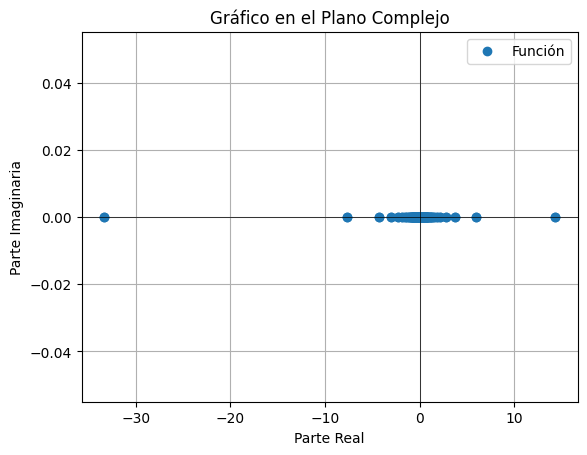

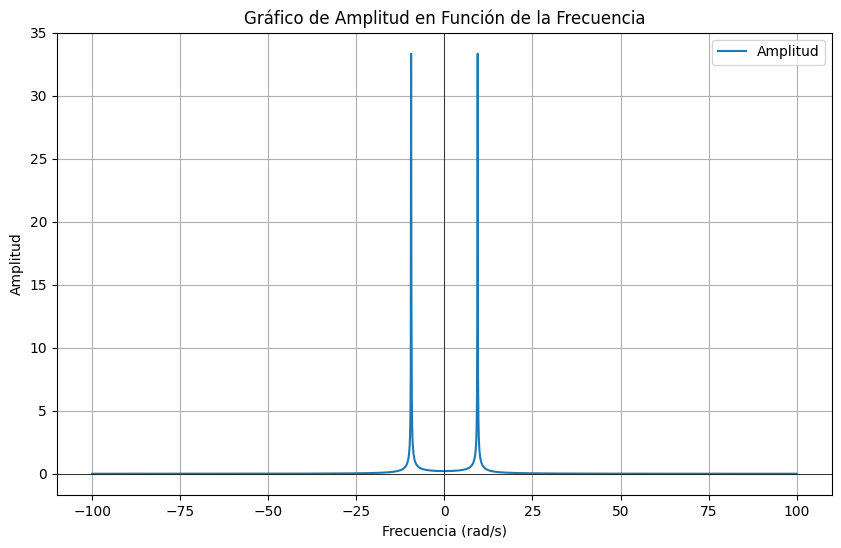

In [26]:
import sympy as sp
from sympy.integrals.manualintegrate import integral_steps
import matplotlib.pyplot as plt
import numpy as np

def aplicar_equivalencias(expresion):
    t = sp.symbols("t")
    n = sp.symbols("n")

    equivalencias = {
        sp.sin(sp.pi * n): 0,
        sp.cos(sp.pi * n): (-1)**n,
        sp.sin(2 * sp.pi * n): 0,
        sp.cos(2 * sp.pi * n): 1,
        sp.E**(-2 * sp.I * n * sp.pi ): 1,
        sp.E**(2 * sp.I * n * sp.pi ): 1,
        sp.E**(-sp.I * n * sp.pi ): (-1)**n,
        sp.E**(sp.I * n * sp.pi ): (-1)**n
    }
    for eq, val in equivalencias.items():
        expresion = expresion.subs(eq, val)
    return expresion

def aplicar_equivalencias_transformadas_fourier(expresion,a):
    t = sp.symbols('t')
    delta = sp.symbols('delta')
    u = sp.symbols('u')
    sgn = sp.symbols('sgn')
    pd = sp.symbols('pd')
    sinc = sp.symbols('sinc')
    e = sp.symbols('e')
    w = sp.symbols('w')
    equivalencias = {
        delta : sp.DiracDelta(t-a),
        u     : sp.Heaviside(t),
        sgn   : sp.sign(t),
        pd    : sp.Piecewise((1, (t >= -a) & (t <= a)), (0, True)),
        sinc  : sp.Piecewise(sp.simplify((sp.sin(sp.pi*(t-a))/(sp.pi*(t-a)), t != 0)), (1, (t-a) == 0)),
        e     : sp.exp
    }
    for eq, val in equivalencias.items():
        expresion = expresion.subs(eq, val)
    return expresion

def ingresar_funcion_a_trozos():
    t = sp.symbols("t")
    print("Ingrese las ecuaciones en términos de 't'. Presione Enter para finalizar.")

    expresiones_condiciones = []
    menor_limite = float('inf')
    mayor_limite = float('-inf')

    while True:
        ecuacion = input("\nIngrese una ecuación (en términos de t): ")
        if not ecuacion:
            break

        try:
            print("Ingrese los límites de integración de la ecuación anterior")
            limite_inferior = float(input("Ingrese el límite inferior: "))
            limite_superior = float(input("Ingrese el límite superior: "))

            menor_limite = min(menor_limite, limite_inferior)
            mayor_limite = max(mayor_limite, limite_superior)

            expresion = sp.sympify(ecuacion)
            condicion = (limite_inferior <= sp.Symbol('t')) & (sp.Symbol('t') <= limite_superior)
            expresiones_condiciones.append((expresion, condicion))

        except sp.SympifyError:
            print("Error: No se pudo ingresar la ecuación.")

    funcion_trozos = sp.Piecewise(*expresiones_condiciones)
    return funcion_trozos, menor_limite, mayor_limite

def ingresar_funcion_generalidas():
    t = sp.symbols("t")
    delta = sp.symbols('delta')
    u = sp.symbols('u')
    sgn = sp.symbols('sgn')
    pd = sp.symbols('pd')
    sinc = sp.symbols('sinc')

    print("Ingrese las ecuaciones en términos de 't'. Presione Enter para finalizar.\n")
    
    print("--------------- Equivalencias de funciones generalizadas ---------------")
    print("¡¡¡¡Si deceas usar una funciones escribe la tal cual la veas!!!!")
    print("Delta de Dirac(delta(t-a))  : delta \n",
          "Escalón de Heaviside (u(t)) : u\n",
          "Función Signo (sgn(t))      : sgn\n",
          "Función Rectángulo(Pd(t-a)) : pd\n",
          "Función Sinc (sinc(t-a))    : sinc\n",
          "Exponecial                  : sp.exp(t)\n",
          "Función Seno                : sp.sin(t)")
    
    expresiones_condiciones = []
    menor_limite = float('inf')
    mayor_limite = float('-inf')
    a = float(0)
    while True:
        ecuacion = input("\nIngrese una ecuación (en términos de t): ")
        if not ecuacion:
            break

        try:
            print("Ingrese los límites de integración de la ecuación anterior")
            limite_inferior = float(input("Ingrese el límite inferior: "))
            limite_superior = float(input("Ingrese el límite superior: "))

            if ecuacion.has(delta) or ecuacion.has(sinc) or ecuacion.has(pd):
                a = input("\nIngrese el valor de a : ")

            expresion = sp.sympify(ecuacion)
            condicion = (limite_inferior <= sp.Symbol('t')) & (sp.Symbol('t') <= limite_superior)
            expresiones_condiciones.append((expresion, condicion))

        except sp.SympifyError:
            print("Error: No se pudo ingresar la ecuación.")

    funcion_trozos = sp.Piecewise(*expresiones_condiciones)
    return funcion_trozos, menor_limite, mayor_limite, a

def mostrar_pasos_integracion(expr, variable):

    # Inicializar la impresión de SymPy
    sp.init_printing()

    # Obtener los pasos de integración
    steps = integral_steps(expr, variable)

    # Función recursiva para mostrar los pasos de manera legible
    def print_steps(step, level=0):
        indent = "  " * level
        if hasattr(step, 'rule'):
            display(sp.Eq(step.lhs, step.rhs))
            if hasattr(step, 'substeps'):
                for substep in step.substeps:
                    print_steps(substep, level + 1)

    # Mostrar los pasos de integración
    print("Pasos de Integración:")
    print_steps(steps)

    # Evaluar el resultado final utilizando integrate directamente
    result = sp.integrate(expr, variable)
    display(sp.Eq(sp.Integral(expr, variable), result))

def hallar_coeficientes(funcion_original, menor_limite, mayor_limite):
    t = sp.symbols('t')
    n = sp.symbols("n", domain='N')
    T = abs(menor_limite - mayor_limite)
    w = (2 * sp.pi) / T

    integral_ao = sp.sympify(0)
    integral_an = sp.sympify(0)
    integral_bn = sp.sympify(0)

    for expr, cond in funcion_original.args:
        inecuaciones = cond.args
        a = float('inf')
        b = float('-inf')
        for i in  range(0,len(inecuaciones),1):
            if isinstance(inecuaciones[i].args[1], sp.Lt) or isinstance(inecuaciones[i].args[1], sp.Le) or isinstance(inecuaciones[i].args[1], sp.Gt) or isinstance(inecuaciones[i].args[1], sp.Ge):
                a = min(a, inecuaciones[i].args[1].args[1])
                b = max(b, inecuaciones[i].args[1].args[1])
            else:
                a = min(a, inecuaciones[i].args[1])
                b = max(b, inecuaciones[i].args[1])
            #print("a = ",a,"  b = ",b, "expr = ", expr)

        try:
            integral_ao = integral_ao + (sp.integrate(expr, (t, a, b)))
            integral_an = integral_an + (sp.integrate(sp.sympify(expr * sp.cos(n * w * t)), (t, a, b))).args[0][0] 
            integral_bn = integral_bn + (sp.integrate(sp.sympify(expr * sp.sin(n * w * t)), (t, a, b))).args[0][0] 
        except Exception as e:
            integral_ao = integral_ao + 0
            integral_an = integral_an + 0
            integral_bn = integral_bn + 0

    return integral_ao*(2/T), integral_an*(2/T), integral_bn*(2/T)

def hallar_serie_Fourier(funcion_a_trozos, menor_limite, mayor_limite, nmax):
    t = sp.symbols('t')
    n = sp.symbols("n")
    T = abs(menor_limite - mayor_limite)
    w = (2 * sp.pi) / T
    ao, an, bn = hallar_coeficientes(funcion_a_trozos, menor_limite, mayor_limite)

    print("\n----------- Ao ----------- ")
    display(ao)
    print("\n----------- An ----------- ")
    display(an)
    print("\n----------- Bn ----------- ")
    display(bn)


    serie_Fourier = ao/2 + sp.summation(an*sp.cos(n*w*t) + bn*sp.sin(n*w*t), (n, 1, nmax))
    return serie_Fourier

def hallar_coeficientes_espectros_discretos(funcion_original, menor_limite, mayor_limite):
    t = sp.symbols('t')
    n = sp.symbols("n")
    T = abs(menor_limite - mayor_limite)
    w = (2 * sp.pi) / T

    integral_Co = sp.sympify(0)
    integral_Cn = sp.sympify(0)

    for expr, cond in funcion_original.args:
        inecuaciones = cond.args
        a = float('inf')
        b = float('-inf')
        for i in  range(0,len(inecuaciones),1):
            if isinstance(inecuaciones[i].args[1], sp.Lt) or isinstance(inecuaciones[i].args[1], sp.Le) or isinstance(inecuaciones[i].args[1], sp.Gt) or isinstance(inecuaciones[i].args[1], sp.Ge):
                a = min(a, inecuaciones[i].args[1].args[1])
                b = max(b, inecuaciones[i].args[1].args[1])
            else:
                a = min(a, inecuaciones[i].args[1])
                b = max(b, inecuaciones[i].args[1])
            #print("a = ",a,"  b = ",b, "expr = ", expr)

        print ("**/*/*", sp.integrate(sp.sympify(expr * sp.E**(-sp.I * n * w * t)), (t, a, b)))
        try:
            integral_Co = integral_Co + (sp.integrate(expr, (t, a, b)))
            integral_Cn = integral_Cn + (sp.integrate(sp.sympify(expr * sp.E**(-sp.I * n * w * t)), (t, a, b))).args[0][0] 
        except Exception as e:
            integral_Co = integral_Co + 0
            integral_Cn = integral_Cn + 0
            print(f"Ocurrió un error: {e}")
        display ("integral_Co = ",integral_Co," integral_Cn = ",integral_Cn)

        integral_Co = aplicar_equivalencias(integral_Co)
        integral_Cn = aplicar_equivalencias(integral_Cn)

    ao, an, bn = hallar_coeficientes(funcion_original, menor_limite, mayor_limite)

    #display("an ",an,"bn ",  bn)

    Cn_real = (1/2)*(an)
    Cn_imag = (1/2)*(-bn)

    return sp.sympify(integral_Co/T), sp.sympify(integral_Cn/T), sp.sympify(Cn_real), sp.sympify(Cn_imag)

"""
T = abs(menor_limite - mayor_limite)
w = (2 * sp.pi) / T

# Función Delta de Dirac
delta = DiracDelta(x)

# Función Escalón de Heaviside
heaviside = Heaviside(x)

# Función Signo
sign_function = sign(x)

# Función Rectángulo
rectangular = Piecewise((1, (x >= -0.5) & (x <= 0.5)), (0, True))

# Función Sinc
sinc_function = Piecewise((sin(pi*x)/(pi*x), x != 0), (1, x == 0))

"""

def hallar_transformada_fourier(funcion_original, menor_limite, mayor_limite, a):
    t = sp.symbols('t')
    w = sp.symbols('w')
    delta = sp.symbols('delta')
    u = sp.symbols('u')
    sgn = sp.symbols('sgn')
    pd = sp.symbols('pd')
    sinc = sp.symbols('sinc')

    #print ("**/*////*", funcion_original*sp.exp(-sp.I*w*t))

    try:
        funcion_original = aplicar_equivalencias_transformadas_fourier(funcion_original,a)
        #display("1 apliacion : ",funcion_original)
        integral_transformada = (sp.integrate(funcion_original*sp.exp(-sp.I*w*t), (t, -sp.oo, sp.oo)))
    except Exception as e:
        funcion_original = aplicar_equivalencias_transformadas_fourier(funcion_original,a)
        #display("2 apliacion : ",funcion_original)
        integral_transformada = 0
        print(f"Ocurrió un error.: {e}")

    mostrar_pasos_integracion(funcion_original*sp.exp(-sp.I*w*t),t)

    display ("integral_transformada : ",integral_transformada)

    try:
        #print("transformada.- = ",integral_transformada.args[0][0])
        #print ("Type: ",type(integral_transformada.args[0][0]))
        return sp.expand(integral_transformada.args[0][0] )
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        #display("transformada.. = ",integral_transformada)
        #print ("Type: ",type(integral_transformada))
        return sp.expand(integral_transformada)         
    
def graficar_discretos_espectro_magnitud_fase(n_inicio, n_fin, num_puntos, Cn_real, Cn_imag, Co):
    n = sp.symbols('n')

    # Definir las funciones como lambdify
    funcion1 = sp.lambdify(n, sp.sqrt(Cn_real**2 + Cn_imag**2), 'numpy')
    funcion2 = sp.lambdify(n, sp.atan(Cn_imag/Cn_real), 'numpy')

    # Crear una figura con dos subgráficos
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # Calcular valores de n
    n_values = np.linspace(n_inicio, n_fin, num_puntos)

    print("n_values ", n_values)
    
    # Calcular valores de y para cada función
    y_values_funcion1 = [funcion1(valor) if valor != 0 else Co for valor in n_values]

    y_values_funcion2 = []
    for valor in n_values:
        if valor <= -1 or valor >= 1:
            if Cn_real.subs(n, valor) != 0:
                y_values_funcion2.append(funcion2(valor))
            else:
                y_values_funcion2.append(sp.pi/2 if valor >= 0 else -sp.pi/2)
        else:
            y_values_funcion2.append(0)

    print("y_values_funcion1 ", y_values_funcion1)
    print("y_values_funcion2 ", y_values_funcion2)

    # Graficar la primera función en el primer subgráfico
    ax1.plot(n_values, y_values_funcion1, color='blue', label='Función 1', marker='o')
    ax1.set_xlabel('n')
    ax1.set_ylabel('f(n)')
    ax1.set_title('Gráfico de la magnitud')
    ax1.grid(True)
    ax1.legend()

    # Añadir la altura numérica de cada punto en la gráfica de la Función 1
    for i, (x, y) in enumerate(zip(n_values, y_values_funcion1)):
        ax1.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='black')

    # Graficar la segunda función en el segundo subgráfico
    ax2.plot(n_values, y_values_funcion2, color='red', label='Función 2', marker='o')
    ax2.set_xlabel('n')
    ax2.set_ylabel('f(n)')
    ax2.set_title('Gráfico de fase')
    ax2.grid(True)
    ax2.legend()

    # Añadir la altura numérica de cada punto en la gráfica de la Función 2
    for i, (x, y) in enumerate(zip(n_values, y_values_funcion2)):
        ax2.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='black')

    # Ajustar diseño de la figura
    plt.tight_layout()
    plt.show()

def graficar_funciones(t_inicio, t_fin, num_puntos, funcion1, funcion2):
    t = sp.symbols('t')

    funcion1_np = np.vectorize(lambda t_val: funcion1.subs(t, t_val))
    funcion2_np = np.vectorize(lambda t_val: funcion2.subs(t, t_val))

    t_values = np.linspace(t_inicio, t_fin, num_puntos)

    y_values_funcion1 = funcion1_np(t_values)
    y_values_funcion2 = funcion2_np(t_values)

    plt.plot(t_values, y_values_funcion1, label='Función 1')
    plt.plot(t_values, y_values_funcion2, label='Función 2')

    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.title('Gráfico de dos funciones')
    plt.legend()

    plt.grid(True)
    plt.show()

def graficar_transformada(w_inicio, w_fin, num_puntos, funcion1):
    w = sp.symbols('w')

    display ("tranformad ",funcion1)

    # Crear una función lambda para evaluar la función simbólica en numpy
    funcion1_np = np.vectorize(lambda w_val: funcion1.subs(w, w_val).evalf())

    # Generar valores de w
    w_values = np.linspace(w_inicio, w_fin, num_puntos)

    # Evaluar la función en los valores de w
    y_values_funcion1 = funcion1_np(w_values)

    # Separar las partes real e imaginaria
    y_values_funcion1_real = np.array([sp.re(y_val).evalf() for y_val in y_values_funcion1])
    y_values_funcion1_imag = np.array([sp.im(y_val).evalf() for y_val in y_values_funcion1])
    y_values_amplitud = np.array([abs(y_val).evalf() for y_val in y_values_funcion1])
    display("reales: ",y_values_funcion1_real)
    display("imagin: ",y_values_funcion1_imag)

    # Graficar en el plano complejo
    #plt.figure(figsize=(1, 1))
    plt.plot(y_values_funcion1_real, y_values_funcion1_imag, 'o', label='Función')

    #plt.xlim(-2, 2)
    #plt.ylim(-40, 40)
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    plt.title('Gráfico en el Plano Complejo')
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    #plt.show()

    # Graficar la amplitud en función de la frecuencia
    plt.figure(figsize=(10, 6))
    plt.plot(w_values, y_values_amplitud, label='Amplitud')
    plt.xlabel('Frecuencia (rad/s)')
    plt.ylabel('Amplitud')
    plt.title('Gráfico de Amplitud en Función de la Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

def generar_funcion_par_o_impar(funcion, es_par):
    #print("ESpar : ",es_par, " Tipo : ",type(es_par) )

    t = sp.symbols('t')
    if es_par == "1":
        funcion_return = funcion.subs(t, -t)
    else:
        funcion_impar = funcion.subs(t, -t)
        funcion_return = sp.sympify(-1 * funcion_impar)
    return funcion_return

def generar_funcion_a_trozos_par_o_impar(funcion_original, menor_limite, mayor_limite, es_par):
    t = sp.symbols('t')
    a, b = sp.symbols('a b')

    casos_y_condiciones = []
    for expr, cond in funcion_original.args:
        inecuaciones = cond.args
        a = inecuaciones[0].args[1]
        b = inecuaciones[1].args[1]
        casos_y_condiciones.append((generar_funcion_par_o_impar(expr, es_par),((sp.Symbol('t') <= -b ) & (sp.Symbol('t') >= -a))))

    #print("casos_y_condiciones ",casos_y_condiciones)

    lista_retorno = casos_y_condiciones + list(funcion_original.args)

    casos_y_condiciones_retorno = []
    for expr, cond in lista_retorno:
        inecuaciones = cond.args
        a = float('inf')
        b = float('-inf')
        for i in  range(0,len(inecuaciones),1):
            #print("a ", a, "  b ",b,"inecuaciones[i].args[1] ", inecuaciones[i].args[1])
            if isinstance(inecuaciones[i].args[1], sp.Lt) or isinstance(inecuaciones[i].args[1], sp.Le) or isinstance(inecuaciones[i].args[1], sp.Gt) or isinstance(inecuaciones[i].args[1], sp.Ge):
                a = min(a, inecuaciones[i].args[1].args[1])
                b = max(b, inecuaciones[i].args[1].args[1])
            else:
                a = min(a, inecuaciones[i].args[1])
                b = max(b, inecuaciones[i].args[1])
            #print("a = ",a,"  b = ",b)
        casos_y_condiciones_retorno.append((expr, ((a <= sp.Symbol('t')) & (sp.Symbol('t') <= b))))

    #print("casos_y_condiciones_retorno ",casos_y_condiciones_retorno)
    distancia_num1 = abs(menor_limite)
    distancia_num2 = abs(mayor_limite)

    if distancia_num1 > distancia_num2:
        return sp.Piecewise(*casos_y_condiciones_retorno), -distancia_num1, distancia_num1
    elif distancia_num2 > distancia_num1:
        return sp.Piecewise(*casos_y_condiciones_retorno), -distancia_num2, distancia_num2

def generar_funcion_media_onda(funcion, desplazamineto):
    t = sp.symbols('t')
    funcion_return = funcion.subs(t, t-desplazamineto)
    funcion_return = sp.sympify(-1 * funcion_return)
    return funcion_return

def generar_funcion_a_trozos_media_onda(funcion_original, menor_limite, mayor_limite):
    t = sp.symbols('t')
    a, b = sp.symbols('a b')
    
    distancia_num1 = abs(menor_limite)
    distancia_num2 = abs(mayor_limite)

    if distancia_num1 > distancia_num2:
        desplazamineto = -abs(mayor_limite-menor_limite)
    else:
        desplazamineto = abs(mayor_limite-menor_limite)
    
    #print("desplazamineto: ",desplazamineto)

    casos_y_condiciones = []
    for expr, cond in funcion_original.args:
        inecuaciones = cond.args
        #print("#####",inecuaciones[0].args[1],"#####", inecuaciones[1].args[1])
        a = min(inecuaciones[0].args[1], inecuaciones[1].args[1])
        b = max(inecuaciones[0].args[1], inecuaciones[1].args[1])
        
        #print("funcion", generar_funcion_media_onda(expr, desplazamineto),"a = ",a,"  b = ",b, "desplazamineto  ", desplazamineto)
        casos_y_condiciones.append((generar_funcion_media_onda(expr, desplazamineto), ((sp.Symbol('t') >= a + desplazamineto) & (sp.Symbol('t') <= b + desplazamineto))))
        #print ("despalzamiento de condiciones: ", sp.sympify(cond.subs(t, t + desplazamineto)))

    #casos_y_condiciones_retorno = [(generar_funcion_media_onda(expr, desplazamineto), cond) for expr, cond in casos_y_condiciones]
    lista_retorno = casos_y_condiciones + list(funcion_original.args)
    #print("--------> ",lista_retorno,"\n+++++++", menor_limite,"\n+++++++", mayor_limite)

    if distancia_num1 > distancia_num2:
        return sp.Piecewise(*lista_retorno), menor_limite + desplazamineto, mayor_limite
    else: 
        return sp.Piecewise(*lista_retorno), menor_limite, mayor_limite + desplazamineto

def generar_funcion_a_trozos_cuarto_de_onda(funcion_original, menor_limite, mayor_limite, es_par):
    t = sp.symbols('t')
    a, b = sp.symbols('a b')

    funcion_par_o_impar, menor_limite, mayor_limite = generar_funcion_a_trozos_par_o_impar(funcion_original, menor_limite, mayor_limite, es_par)
    #print("8888888888  ",funcion_par_o_impar,"8888888888  ", menor_limite,"8888888888  ", mayor_limite, es_par)


    funcion_return, menor_limite, mayor_limite = generar_funcion_a_trozos_media_onda(funcion_par_o_impar, menor_limite, mayor_limite)
    #print("8888888888  ",funcion_return,"8888888888  ", menor_limite,"8888888888  ", mayor_limite, es_par)

    return  funcion_return, menor_limite, mayor_limite

def proceso_basico():
    t = sp.symbols('t')
    n = sp.symbols("n")
    
    funcion_original = sp.Piecewise((-4*t - 2, (t >= -3.0) & (t <= 1)), (1, (t <= 2.0) & (t >= 1)), (t-2, (t <= 8.0) & (t >= 2.0)))
    menor_limite = -3
    mayor_limite = 8

    print("++++++++++++++++ Funcion ingresada ++++++++++++++++")
    display(funcion_original)

    T = abs(menor_limite - mayor_limite)
    ao, an, bn = hallar_coeficientes(funcion_original, menor_limite, mayor_limite)
    w = (2 * sp.pi) / T
    nmax = 15
    funcion_Fourier = ao/2 + sp.summation(an*sp.cos(n*w*t) + bn*sp.sin(n*w*t), (n, 1, nmax))

    #display(funcion_Fourier)
    graficar_funciones(menor_limite, mayor_limite, 120, funcion_original, funcion_Fourier)

def proceso_extensiones_par_o_impar():
    t = sp.symbols('t')
     
    esPar = input("Ingrese 0 si desea la extencion impar y 1 si desea la extencion par")
    #funcion_original, menor_limite, mayor_limite = ingresar_funcion_a_trozos()
    
    funcion_original=sp.Piecewise((1, (t >= -2.0) & (t <= -1)), (t, (t >= -1.0) & (t <= 0)))#(-4*t - 2, (t >= -3.0) & (t <= -2)), 

    menor_limite = -2
    mayor_limite = 0
    
    print("++++++++++++++++ Funcion ingresada ++++++++++++++++")
    display(funcion_original)

    funcion_original, menor_limite, mayor_limite = generar_funcion_a_trozos_par_o_impar(funcion_original, menor_limite, mayor_limite, esPar)
    print("++++++++++++++++ Funcion generada ++++++++++++++++")
    display(funcion_original)

    serie_Fourier = hallar_serie_Fourier(funcion_original, menor_limite, mayor_limite, 12)
    graficar_funciones(menor_limite, mayor_limite, 100, funcion_original, serie_Fourier)

def proceso_extensiones_media_onda():
    t = sp.symbols('t')

    # funcion_original, menor_limite, mayor_limite = ingresar_funcion_a_trozos()
    
    #funcion_original=sp.Piecewise((1, (t >= -2.0) & (t <= -1)), (t, (t >= -1.0) & (t <= 0)))#(-4*t - 2, (t >= -3.0) & (t <= -2)), 

    funcion_original=sp.Piecewise((1, (t <= 2.0) & (t >= 1)), (-t, (t <= 1.0) & (t >= -1)))#(-4*t - 2, (t > -3.0) & (t < -2)), 

    menor_limite = -1
    mayor_limite = 2

    print("++++++++++++++++ Funcion ingresada ++++++++++++++++")
    display(funcion_original)
    
    funcion_original, menor_limite, mayor_limite = generar_funcion_a_trozos_media_onda(funcion_original, menor_limite, mayor_limite)


    print("++++++++++++++++ Funcion de media onda ++++++++++++++++")
    print("de", menor_limite, " a ", mayor_limite)
    display(funcion_original)

    serie_Fourier = hallar_serie_Fourier(funcion_original, menor_limite, mayor_limite, 12)
    graficar_funciones(menor_limite-3, mayor_limite+3, 100, funcion_original, serie_Fourier)

def proceso_extensiones_cuarto_de_onda():
    t = sp.symbols('t')

    esPar = input("Ingrese 0 si desea la extencion de cuarto de onda impar y 1 si desea la extencion de cuarto de onda  par")

    # funcion_original, menor_limite, mayor_limite = ingresar_funcion_a_trozos()
    
    funcion_original=sp.Piecewise((t+1, (t > -2.0) & (t < -1)),(1, (t > -1) & (t < 0)) )#, , (t, (t > -1.0) & (t < 0))
 
    menor_limite = -2
    mayor_limite = 0
    
    print("++++++++++++++++ Funcion ingresada ++++++++++++++++")
    display(funcion_original)

    funcion_cuarto_de_onda, menor_limite, mayor_limite = generar_funcion_a_trozos_cuarto_de_onda(funcion_original, menor_limite, mayor_limite,esPar)

    print("++++++++++++++++ Funcion de cuarto de onda ++++++++++++++++")
    display(funcion_cuarto_de_onda)

    serie_Fourier = hallar_serie_Fourier(funcion_cuarto_de_onda, menor_limite, mayor_limite, 15)
    graficar_funciones(menor_limite, mayor_limite, 100, funcion_cuarto_de_onda, serie_Fourier)

def proceso_espctros_discretos():
    t = sp.symbols('t')
    n = sp.symbols('n')
    funcion_original, menor_limite, mayor_limite = ingresar_funcion_a_trozos()

    #funcion_original=sp.Piecewise((-0.5*t, (t > 0) & (t < 1)),(0.4*(t**2), (t > 1) & (t < 2)))

    #menor_limite = 0
    #mayor_limite = 2

    print("++++++++++++++++ Funcion ingresada ++++++++++++++++")
    display(funcion_original)

    Co,Cn, Cn_real, Cn_imag= hallar_coeficientes_espectros_discretos(funcion_original,menor_limite,mayor_limite)

    funcion2 = sp.lambdify(n, Cn_real, 'numpy')
    Cn_real = aplicar_equivalencias(Cn_real)
    Cn_imag = aplicar_equivalencias(Cn_imag)

    display("Co", Co)
    display("Cn", Cn)

    display("Cn_real", aplicar_equivalencias(Cn_real))
    display("Cn_imag", aplicar_equivalencias(Cn_imag))

    graficar_discretos_espectro_magnitud_fase(-6, 6, 13, Cn_real, Cn_imag, Co)

def proceso_tansformada_fourier():
    t = sp.symbols('t')
    n = sp.symbols('n')
    w = sp.symbols('w')
    delta = sp.symbols('delta')
    u = sp.symbols('u')
    sgn = sp.symbols('sgn')
    pd = sp.symbols('pd')
    sinc = sp.symbols('sinc')
    e = sp.symbols('e')
    a = float ( 0 )

    """
    print("--------------- Equivalencias de funciones generalizadas ---------------")
    print("¡¡¡¡Si deceas usar una funciones escribe la tal cual la veas!!!!")
    print("Delta de Dirac(delta(t-a))  : delta ",
          "Escalón de Heaviside (u(t)) : u",
          "Función Signo (sgn(t))      : sgn",
          "Función Rectángulo(Pd(t-a)) : pd",
          "Función Sinc (sinc(t-a))    : sinc")
    """
          
    #funcion_original, menor_limite, mayor_limite, a = ingresar_funcion()

    #funcion_original = sp.simplify(t*sp.exp(-3*t)*u)
    #funcion_original = sp.simplify((1/2) * sp.sin(4 * sp.pi * t)+(1/3) * sp.sin(6 * sp.pi * t)+ sp.sin(2 * sp.pi * t))
    #funcion_original = sp.simplify(sp.sin(3 * t) * sp.sin(3 * t))
    funcion_original = sp.simplify(sp.sin(3 * sp.pi * t) * sgn)

    a = float (20)
    menor_limite = float('inf')
    mayor_limite = float('-inf')

    print("++++++++++++++++ Funcion ingresada ++++++++++++++++")
    display(funcion_original)

    integral_trans = hallar_transformada_fourier(funcion_original,menor_limite,mayor_limite,a)

    try:
        transformada = integral_trans.args[0][0]
        #display("integral_transformada. = ",transformada.args[0][0])
    except Exception as e:
        transformada = integral_trans
        #display("integral_transformada.. = ",transformada)
        print(f"Ocurrió un error: {e}")

    #display("type.. ", type(transformada))
    graficar_transformada(-100,100,2000,transformada) 

if __name__ == "__main__":
    #proceso_basico()
    #proceso_extensiones_par_o_impar()
    #proceso_extensiones_media_onda()
    #proceso_extensiones_cuarto_de_onda()
    #proceso_espctros_discretos()
    proceso_tansformada_fourier()


++++++++++++++++ Funcion ingresada ++++++++++++++++


Pasos de Integración:


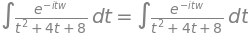

'integral_transformada : '

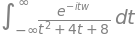

Ocurrió un error: 'Mul' object is not subscriptable
Ocurrió un error: 'Pow' object is not subscriptable


'tranformad '

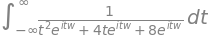

KeyboardInterrupt: 

In [2]:
import sympy as sp
from sympy.integrals.manualintegrate import integral_steps
import matplotlib.pyplot as plt
import numpy as np

def aplicar_equivalencias(expresion):
    t = sp.symbols("t")
    n = sp.symbols("n")

    equivalencias = {
        sp.sin(sp.pi * n): 0,
        sp.cos(sp.pi * n): (-1)**n,
        sp.sin(2 * sp.pi * n): 0,
        sp.cos(2 * sp.pi * n): 1,
        sp.E**(-2 * sp.I * n * sp.pi ): 1,
        sp.E**(2 * sp.I * n * sp.pi ): 1,
        sp.E**(-sp.I * n * sp.pi ): (-1)**n,
        sp.E**(sp.I * n * sp.pi ): (-1)**n
    }
    for eq, val in equivalencias.items():
        expresion = expresion.subs(eq, val)
    return expresion

def aplicar_equivalencias_transformadas_fourier(expresion,a):
    t = sp.symbols('t')
    delta = sp.symbols('delta')
    u = sp.symbols('u')
    sgn = sp.symbols('sgn')
    pd = sp.symbols('pd')
    sinc = sp.symbols('sinc')
    e = sp.symbols('e')
    w = sp.symbols('w')
    equivalencias = {
        delta : sp.DiracDelta(t-a),
        u     : sp.Heaviside(t),
        sgn   : sp.sign(t),
        pd    : sp.Piecewise((1, (t >= -a) & (t <= a)), (0, True)),
        sinc  : sp.Piecewise(sp.simplify((sp.sin(sp.pi*(t-a))/(sp.pi*(t-a)), t != 0)), (1, (t-a) == 0)),
        e     : sp.exp
    }
    for eq, val in equivalencias.items():
        expresion = expresion.subs(eq, val)
    return expresion

def ingresar_funcion_a_trozos():
    t = sp.symbols("t")
    print("Ingrese las ecuaciones en términos de 't'. Presione Enter para finalizar.")

    expresiones_condiciones = []
    menor_limite = float('inf')
    mayor_limite = float('-inf')

    while True:
        ecuacion = input("\nIngrese una ecuación (en términos de t): ")
        if not ecuacion:
            break

        try:
            print("Ingrese los límites de integración de la ecuación anterior")
            limite_inferior = float(input("Ingrese el límite inferior: "))
            limite_superior = float(input("Ingrese el límite superior: "))

            menor_limite = min(menor_limite, limite_inferior)
            mayor_limite = max(mayor_limite, limite_superior)

            expresion = sp.sympify(ecuacion)
            condicion = (limite_inferior <= sp.Symbol('t')) & (sp.Symbol('t') <= limite_superior)
            expresiones_condiciones.append((expresion, condicion))

        except sp.SympifyError:
            print("Error: No se pudo ingresar la ecuación.")

    funcion_trozos = sp.Piecewise(*expresiones_condiciones)
    return funcion_trozos, menor_limite, mayor_limite

def ingresar_funcion_generalidas():
    t = sp.symbols("t")
    delta = sp.symbols('delta')
    u = sp.symbols('u')
    sgn = sp.symbols('sgn')
    pd = sp.symbols('pd')
    sinc = sp.symbols('sinc')

    print("Ingrese las ecuaciones en términos de 't'. Presione Enter para finalizar.\n")
    
    print("--------------- Equivalencias de funciones generalizadas ---------------")
    print("¡¡¡¡Si deceas usar una funciones escribe la tal cual la veas!!!!")
    print("Delta de Dirac(delta(t-a))  : delta \n",
          "Escalón de Heaviside (u(t)) : u\n",
          "Función Signo (sgn(t))      : sgn\n",
          "Función Rectángulo(Pd(t-a)) : pd\n",
          "Función Sinc (sinc(t-a))    : sinc\n",
          "Exponecial                  : sp.exp(t)\n",
          "Función Seno                : sp.sin(t)")
    
    expresiones_condiciones = []
    menor_limite = float('inf')
    mayor_limite = float('-inf')
    a = float(0)
    while True:
        ecuacion = input("\nIngrese una ecuación (en términos de t): ")
        if not ecuacion:
            break

        try:
            print("Ingrese los límites de integración de la ecuación anterior")
            limite_inferior = float(input("Ingrese el límite inferior: "))
            limite_superior = float(input("Ingrese el límite superior: "))

            if ecuacion.has(delta) or ecuacion.has(sinc) or ecuacion.has(pd):
                a = input("\nIngrese el valor de a : ")

            expresion = sp.sympify(ecuacion)
            condicion = (limite_inferior <= sp.Symbol('t')) & (sp.Symbol('t') <= limite_superior)
            expresiones_condiciones.append((expresion, condicion))

        except sp.SympifyError:
            print("Error: No se pudo ingresar la ecuación.")

    funcion_trozos = sp.Piecewise(*expresiones_condiciones)
    return funcion_trozos, menor_limite, mayor_limite, a

def mostrar_pasos_integracion(expr, variable):

    # Inicializar la impresión de SymPy
    sp.init_printing()

    # Obtener los pasos de integración
    steps = integral_steps(expr, variable)

    # Función recursiva para mostrar los pasos de manera legible
    def print_steps(step, level=0):
        indent = "  " * level
        if hasattr(step, 'rule'):
            display(sp.Eq(step.lhs, step.rhs))
            if hasattr(step, 'substeps'):
                for substep in step.substeps:
                    print_steps(substep, level + 1)

    # Mostrar los pasos de integración
    print("Pasos de Integración:")
    print_steps(steps)

    # Evaluar el resultado final utilizando integrate directamente
    result = sp.integrate(expr, variable)
    display(sp.Eq(sp.Integral(expr, variable), result))
############################################################################
def hallar_transformada_fourier(funcion_original, menor_limite, mayor_limite, a):
    t = sp.symbols('t')
    w = sp.symbols('w')
    delta = sp.symbols('delta')
    u = sp.symbols('u')
    sgn = sp.symbols('sgn')
    pd = sp.symbols('pd')
    sinc = sp.symbols('sinc')

    #print ("**/*////*", funcion_original*sp.exp(-sp.I*w*t))

    try:
        funcion_original = aplicar_equivalencias_transformadas_fourier(funcion_original,a)
        #display("1 apliacion : ",funcion_original)
        integral_transformada = (sp.integrate(funcion_original*sp.exp(-sp.I*w*t), (t, -sp.oo, sp.oo)))
    except Exception as e:
        funcion_original = aplicar_equivalencias_transformadas_fourier(funcion_original,a)
        #display("2 apliacion : ",funcion_original)
        integral_transformada = 0
        print(f"Ocurrió un error.: {e}")

    mostrar_pasos_integracion(funcion_original*sp.exp(-sp.I*w*t),t)

    display ("integral_transformada : ",integral_transformada)

    try:
        #print("transformada.- = ",integral_transformada.args[0][0])
        #print ("Type: ",type(integral_transformada.args[0][0]))
        return sp.expand(integral_transformada.args[0][0] )
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        #display("transformada.. = ",integral_transformada)
        #print ("Type: ",type(integral_transformada))
        return sp.expand(integral_transformada)         

def graficar_funciones(t_inicio, t_fin, num_puntos, funcion1, funcion2):
    t = sp.symbols('t')

    funcion1_np = np.vectorize(lambda t_val: funcion1.subs(t, t_val))
    funcion2_np = np.vectorize(lambda t_val: funcion2.subs(t, t_val))

    t_values = np.linspace(t_inicio, t_fin, num_puntos)

    y_values_funcion1 = funcion1_np(t_values)
    y_values_funcion2 = funcion2_np(t_values)

    plt.plot(t_values, y_values_funcion1, label='Función 1')
    plt.plot(t_values, y_values_funcion2, label='Función 2')

    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.title('Gráfico de dos funciones')
    plt.legend()

    plt.grid(True)
    plt.show()

def graficar_transformada(w_inicio, w_fin, num_puntos, funcion1):
    w = sp.symbols('w')

    display ("tranformad ",funcion1)

    # Crear una función lambda para evaluar la función simbólica en numpy
    funcion1_np = np.vectorize(lambda w_val: funcion1.subs(w, w_val).evalf())

    # Generar valores de w
    w_values = np.linspace(w_inicio, w_fin, num_puntos)

    # Evaluar la función en los valores de w
    y_values_funcion1 = funcion1_np(w_values)

    # Separar las partes real e imaginaria
    y_values_funcion1_real = np.array([sp.re(y_val).evalf() for y_val in y_values_funcion1])
    y_values_funcion1_imag = np.array([sp.im(y_val).evalf() for y_val in y_values_funcion1])
    y_values_amplitud = np.array([abs(y_val).evalf() for y_val in y_values_funcion1])
    display("reales: ",y_values_funcion1_real)
    display("imagin: ",y_values_funcion1_imag)

    # Graficar en el plano complejo
    #plt.figure(figsize=(1, 1))
    plt.plot(y_values_funcion1_real, y_values_funcion1_imag, 'o', label='Función')

    #plt.xlim(-2, 2)
    #plt.ylim(-40, 40)
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    plt.title('Gráfico en el Plano Complejo')
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    #plt.show()

    # Graficar la amplitud en función de la frecuencia
    plt.figure(figsize=(10, 6))
    plt.plot(w_values, y_values_amplitud, label='Amplitud')
    plt.xlabel('Frecuencia (rad/s)')
    plt.ylabel('Amplitud')
    plt.title('Gráfico de Amplitud en Función de la Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

##############################################################################
def proceso_tansformada_fourier():
    t = sp.symbols('t')
    n = sp.symbols('n')
    w = sp.symbols('w')
    delta = sp.symbols('delta')
    u = sp.symbols('u')
    sgn = sp.symbols('sgn')
    pd = sp.symbols('pd')
    sinc = sp.symbols('sinc')
    e = sp.symbols('e')
    a = float ( 0 )

    """
    print("--------------- Equivalencias de funciones generalizadas ---------------")
    print("¡¡¡¡Si deceas usar una funciones escribe la tal cual la veas!!!!")
    print("Delta de Dirac(delta(t-a))  : delta ",
          "Escalón de Heaviside (u(t)) : u",
          "Función Signo (sgn(t))      : sgn",
          "Función Rectángulo(Pd(t-a)) : pd",
          "Función Sinc (sinc(t-a))    : sinc")
    """
          
    #funcion_original, menor_limite, mayor_limite, a = ingresar_funcion()

    #funcion_original = sp.simplify(t*sp.exp(-3*t)*u)
    funcion_original = sp.simplify(1/(t*t+4*t+8)*u)
    #funcion_original = sp.simplify((1/2) * sp.sin(4 * sp.pi * t)+(1/3) * sp.sin(6 * sp.pi * t)+ sp.sin(2 * sp.pi * t))
    #funcion_original = sp.simplify(sp.sin(3 * t) * sp.sin(3 * t))
    #funcion_original = sp.simplify(sp.sin(3 * sp.pi * t) * sgn)

    a = float (0)
    menor_limite = float('inf')
    mayor_limite = float('-inf')

    print("++++++++++++++++ Funcion ingresada ++++++++++++++++")
    display(funcion_original)

    integral_trans = hallar_transformada_fourier(funcion_original,menor_limite,mayor_limite,a)

    try:
        transformada = integral_trans.args[0][0]
        #display("integral_transformada. = ",transformada.args[0][0])
    except Exception as e:
        transformada = integral_trans
        #display("integral_transformada.. = ",transformada)
        print(f"Ocurrió un error: {e}")

    #display("type.. ", type(transformada))
    graficar_transformada(-100,100,2000,transformada) 

if __name__ == "__main__":
    #proceso_basico()
    #proceso_extensiones_par_o_impar()
    #proceso_extensiones_media_onda()
    #proceso_extensiones_cuarto_de_onda()
    #proceso_espctros_discretos()
    proceso_tansformada_fourier()